In [1]:
# https://dev.to/1n0t/matplotlib-heatmap-calendar-3kbo

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

from datetime import date
from datetime import datetime

import os

In [3]:
folderPath_rsrc = '/Resources/'
folderPath_results = '/Results/'
cwd = os.getcwd()
path_rsrc = cwd + folderPath_rsrc
path_results = cwd + folderPath_results
# read data
ETFs = pd.read_excel(path_rsrc + "ETFs list.xlsx")

In [4]:
ETFs

,Technology,Energy,Telecom,Consumer Discretionary,Real Estate,Industrials,Utilities,Materials,Healthcare,Consumer Staples,Financials
0,AAPB,ACES,FCOM,AMZD,BBRE,AIRR,BLLD,ALUM,AGNG,CHIS,BDCX
1,AAPD,AMJ,IXP,AMZU,BLDG,AQWA,CHIU,BATT,ARKG,CLIX,BDCZ
2,AAPU,AMLP,IYZ,BAD,BYRE,ARKX,ECLN,CHIM,BBC,EATV,BIZD
3,AIQ,AMNA,LTL,BEDZ,CHIR,AWAY,EMIF,CIRC,BBH,EATZ,BNKD
4,ARKK,AMND,NXTG,BETZ,DFGR,BDRY,FUTY,COPX,BBP,ECON,BNKU
...,...,...,...,...,...,...,...,...,...,...,...
163,XPND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,XSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,XSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,XT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sector = "Energy"
energy = ETFs[sector]
energy.dropna(inplace=True)

In [6]:
energy = energy.to_list()

In [18]:
end_ = date.today()  # yyyy-mm-dd
if end_.day == 31:
    start_ = datetime(end_.year, end_.month - 1, 30)
else:
    start_ = datetime(end_.year, end_.month - 1, end_.day)

data = yf.download(energy, start=start_, end=end_, interval="1wk")

[*********************100%%**********************]  86 of 86 completed


In [8]:
end_.day

3

In [9]:
if end_.day == 31:
    start_ = datetime(end_.year, end_.month - 1, 30)

In [10]:
df = data.Close
df

,ACES,AMJ,AMLP,AMNA,AMND,AMTR,AMUB,AMZA,ATMP,BNE,...,TPYP,UMI,USAI,VCLN,VDE,VMAT,WNDY,XES,XLE,XOP
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-02,33.369999,24.070000,40.830002,36.681999,38.098999,48.805000,15.140,33.380001,20.490000,21.493999,...,24.100000,34.419998,26.714001,16.072001,120.070000,25.959999,12.080,88.910004,85.730003,139.449997
2023-10-09,33.720001,24.910000,42.389999,37.875000,39.113998,51.174999,15.655,35.070000,21.230000,21.503000,...,25.110001,35.964001,27.952999,16.275999,125.779999,25.709999,12.190,94.309998,89.589996,148.559998
2023-10-16,30.580000,25.040001,42.840000,37.465000,38.877998,50.625000,15.798,35.279999,21.230000,20.299999,...,24.820000,35.729000,27.705999,15.681000,126.440002,25.302999,11.940,92.980003,90.260002,150.110001
2023-10-23,29.510000,24.570000,41.730000,36.542999,38.035999,49.375999,15.450,34.150002,20.700001,19.586000,...,24.200001,34.816002,26.924999,15.435000,119.150002,24.968000,11.887,88.290001,84.629997,143.899994
2023-10-30,31.330000,25.590000,43.540001,38.233002,39.716000,51.680000,16.114,35.419998,21.700001,20.481001,...,25.417999,36.445000,28.141001,16.048000,123.300003,26.216999,12.155,90.480003,87.559998,148.710007


## Calcular retornos

In [11]:
returns = df.pct_change()
returns

,ACES,AMJ,AMLP,AMNA,AMND,AMTR,AMUB,AMZA,ATMP,BNE,...,TPYP,UMI,USAI,VCLN,VDE,VMAT,WNDY,XES,XLE,XOP
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-09,0.010489,0.034898,0.038207,0.032523,0.026641,0.048561,0.034016,0.050629,0.036115,0.000419,...,0.041909,0.044858,0.046380,0.012693,0.047556,-0.009630,0.009106,0.060736,0.045025,0.065328
2023-10-16,-0.093120,0.005219,0.010616,-0.010825,-0.006034,-0.010747,0.009135,0.005988,0.000000,-0.055946,...,-0.011549,-0.006534,-0.008836,-0.036557,0.005247,-0.015830,-0.020509,-0.014102,0.007479,0.010434
2023-10-23,-0.034990,-0.018770,-0.025910,-0.024610,-0.021657,-0.024672,-0.022028,-0.032029,-0.024965,-0.035172,...,-0.024980,-0.025553,-0.028189,-0.015688,-0.057656,-0.013240,-0.004439,-0.050441,-0.062375,-0.041370
2023-10-30,0.061674,0.041514,0.043374,0.046247,0.044169,0.046662,0.042977,0.037189,0.048309,0.045696,...,0.050331,0.046789,0.045163,0.039715,0.034830,0.050024,0.022546,0.024805,0.034621,0.033426


In [12]:
values = returns.iloc[-1].sort_values(ascending=False)
val_max = values.max()
val_min = values.min()
values

NRGU    0.115323
HDRO    0.084532
HYDR    0.082215
CTEX    0.076886
CNRG    0.074632
          ...   
MLPO   -0.032770
DUG    -0.064681
ERY    -0.065327
DRIP   -0.066477
NRGD   -0.106943
Name: 2023-10-30 00:00:00, Length: 86, dtype: float64

In [13]:
values.values

array([ 0.11532345,  0.08453242,  0.08221473,  0.07688589,  0.07463199,
        0.07223544,  0.06841291,  0.06807821,  0.06661203,  0.0664187 ,
        0.06397647,  0.061674  ,  0.05790442,  0.05778405,  0.05593354,
        0.05564521,  0.05421398,  0.05306996,  0.05103785,  0.05033052,
        0.05002398,  0.04967603,  0.04928038,  0.04830918,  0.04804735,
        0.04804143,  0.04678877,  0.04666236,  0.04663652,  0.04624695,
        0.04622427,  0.04572993,  0.04569593,  0.04532728,  0.04524541,
        0.04516255,  0.04416869,  0.0433741 ,  0.04297738,  0.04257458,
        0.04251937,  0.04213843,  0.04151406,  0.04035871,  0.04013069,
        0.03971493,  0.03897615,  0.03820006,  0.03793186,  0.0379073 ,
        0.03740996,  0.03718877,  0.03655737,  0.03638251,  0.03545493,
        0.03519887,  0.0348923 ,  0.03483006,  0.03480016,  0.0346213 ,
        0.03411585,  0.03342608,  0.03335914,  0.03320345,  0.03314173,
        0.03241992,  0.03216847,  0.03189072,  0.03168858,  0.03

In [14]:
test = [round(i*100,2) for i in values]
test[:10]

[11.53, 8.45, 8.22, 7.69, 7.46, 7.22, 6.84, 6.81, 6.66, 6.64]

In [15]:
length = len(test)
# the idea is to shape an a X b matrix
a = int(np.sqrt(length))
b = int(np.ceil(length/a))
m_length = a * b                # matrix "length"

if m_length >= length:
    # compute how many elements need to be add to the array
    diff = abs(length - m_length)
    
    add =np.full(diff, np.nan)
    new_array = np.append(test, add)
    new_array = new_array.reshape(a, b)
    
    # add names to the plot
    names = values.index.to_list()
    add_names =np.full(diff, '---')
    new_names = np.append(names, add_names)
    new_names = new_names.reshape(a, b)

In [16]:
new_array

array([[ 11.53,   8.45,   8.22,   7.69,   7.46,   7.22,   6.84,   6.81,
          6.66,   6.64],
       [  6.4 ,   6.17,   5.79,   5.78,   5.59,   5.56,   5.42,   5.31,
          5.1 ,   5.03],
       [  5.  ,   4.97,   4.93,   4.83,   4.8 ,   4.8 ,   4.68,   4.67,
          4.66,   4.62],
       [  4.62,   4.57,   4.57,   4.53,   4.52,   4.52,   4.42,   4.34,
          4.3 ,   4.26],
       [  4.25,   4.21,   4.15,   4.04,   4.01,   3.97,   3.9 ,   3.82,
          3.79,   3.79],
       [  3.74,   3.72,   3.66,   3.64,   3.55,   3.52,   3.49,   3.48,
          3.48,   3.46],
       [  3.41,   3.34,   3.34,   3.32,   3.31,   3.24,   3.22,   3.19,
          3.17,   3.13],
       [  3.09,   3.09,   2.56,   2.48,   2.36,   2.25,   1.51,   1.39,
          0.17,   0.13],
       [  0.  ,  -3.28,  -6.47,  -6.53,  -6.65, -10.69,    nan,    nan,
           nan,    nan]])

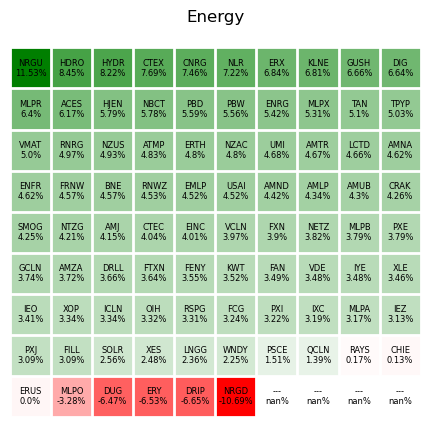

In [17]:
valores = new_array
from  matplotlib.colors import LinearSegmentedColormap
cmap_=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

# "RdYlGn"
fig, ax = plt.subplots()

# Especificamos paleta de colores a usar y rango de valores a representar.
ax.imshow(valores, cmap=cmap_, vmin=val_min*100, vmax=val_max*100)
# borrar axis labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Reducimos la longitud de las marcas a 0 para que no sean visibles
ax.tick_params(axis=u'both', which=u'both', length=0)
for lado in ['left', 'right', 'bottom', 'top']:
    ax.spines[lado].set_visible(False)

# # Indicamos las posiciones donde dibujaremos la rejilla  
xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()

ax.set_yticks(np.arange(ymax, ymin+1), minor=True)
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
# Dibujamos la rejilla de color blanco para que actue como separador.
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

for i in range(new_array.shape[0]):
    for j in range(new_array.shape[1]):
        # print(i, j, valores[i,j])
        text = ax.text(j, i, str(new_names[i, j]) + '\n' + str(valores[i, j])+'%',
                       ha="center", va="center", color="k", size=6)

ax.set_title(f"{sector}\n")
        
plt.savefig(f"{sector}.png")
plt.show()
